In [11]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

^C


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.4.1%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.4.0%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.0%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.2.2%2Bcu121-cp312-cp312-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.2%2Bcu121-cp312-cp312-win_amd64.whl (2454.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2+cu118
    Uninstalling torch-2.2.2+cu

DEPRECATION: Loading egg at c:\python312\lib\site-packages\keras-3.5.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\object_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\pyparsing-2.4.7-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\sacrebleu-2.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Saswata/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-4 Python-3.12.3 torch-2.2.2+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
img = 'https://media.wired.com/photos/5e30880d4c93130008e11814/master/w_2560%2Cc_limit/Transpo-Mumbaitraffic-1079622456.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 1600x2400 13 persons, 10 cars, 3 buss, 1 backpack
Speed: 926.9ms pre-process, 309.9ms inference, 21.4ms NMS per image at shape (1, 3, 448, 640)


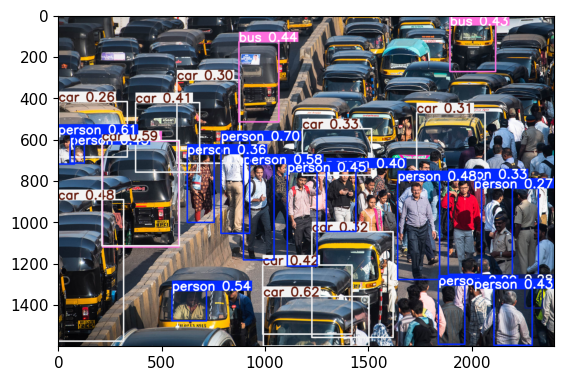

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[36, 32, 31],
         [45, 41, 40],
         [53, 51, 52],
         ...,
         [59, 60, 62],
         [55, 56, 58],
         [52, 53, 55]],
 
        [[40, 36, 35],
         [48, 44, 43],
         [54, 52, 53],
         ...,
         [66, 67, 69],
         [64, 65, 67],
         [62, 63, 65]],
 
        [[46, 42, 41],
         [51, 47, 46],
         [54, 52, 53],
         ...,
         [75, 75, 75],
         [76, 76, 76],
         [76, 76, 76]],
 
        ...,
 
        [[25, 27, 24],
         [22, 24, 21],
         [23, 25, 24],
         ...,
         [17, 17, 19],
         [19, 19, 21],
         [19, 19, 21]],
 
        [[24, 26, 23],
         [22, 24, 21],
         [24, 26, 25],
         ...,
         [17, 17, 19],
         [19, 19, 21],
         [20, 20, 22]],
 
        [[23, 25, 22],
         [22, 24, 21],
         [25, 27, 26],
         ...,
         [16, 16, 18],
         [19, 19, 21],
         [20, 20, 22]]], dtype=uint8)]

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [12]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.56dcad4a-6aca-11ef-abb2-813b42220c13.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.191d2e92-6ac6-11ef-b6c6-813b42220c13.jpg
data\images\awake.191d2e93-6ac6-11ef-b561-813b42220c13.jpg
data\images\awake.191d2e94-6ac6-11ef-8729-813b42220c13.jpg
data\images\awake.191d2e95-6ac6-11ef-a475-813b42220c13.jpg
data\images\awake.191d2e96-6ac6-11ef-a72e-813b42220c13.jpg
data\images\awake.191d2e97-6ac6-11ef-9298-813b42220c13.jpg
data\images\awake.191d2e98-6ac6-11ef-a7a0-813b42220c13.jpg
data\images\awake.191d2e99-6ac6-11ef-b365-813b42220c13.jpg
data\images\awake.191d2e9a-6ac6-11ef-ae99-813b42220c13.jpg
data\images\awake.191d2e9b-6ac6-11ef-bded-813b42220c13.jpg
data\images\awake.191d2e9c-6ac6-11ef-8623-813b42220c13.jpg
data\images\awake.191d2e9d-6ac6-11ef-9857-813b42220c13.jpg
data\images\awake.191d2e9e-6ac6-11ef-a83a-813b42220c13.jpg
data\images\awake.191d2e9f-6ac6-11ef-a371-813b42220c13.jpg
data\images\awake.191d2ea0-6ac6-11ef-bc6d-813b42220c13.jpg
data\images\awake.191d2ea1-6ac6-11ef-b3f9-813b42220c13.jpg
data\images\awake.191d2ea2-6ac6-11ef-87af-813b42220c13.j

In [14]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [15]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl.metadata (2.1 kB)
  Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
Using cached PyQt5-5.15.11-cp38-abi3-win_amd64.whl (6.9 MB)
Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl (3.8 MB)
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.10
    Uninstalling PyQt5-5.15.10:
      Successfully uninstalled PyQt5-5.15.10
  Rolling back uninstall of PyQt5
  Moving to c:\python312\lib\site-packages\pyqt5-5.15.10.dist-info\
   from C:\Python312\Lib\site-packages\~yqt5-5.15.10.dist-info
  Moving to c:\python312\lib\site-packages\pyqt5\__init__.py
   from C:\Users\Saswata\AppData\Local\Temp\pip-uninstall-h5wkk_2v\__init__.py
  Moving to c:\python312\lib\site-packages\pyqt5\__pycache__\
   from C:\Python312\Lib\site-packages\PyQt5\~_pycache__
  Moving to c:\python312\lib\site-packages\pyqt5\_qopenglfunctions_2_0.pyd
   from C:\Users\Saswata\AppData\Local\Temp\pip-uninstall-h5wkk_2v\_qopenglfunctions_2_

DEPRECATION: Loading egg at c:\python312\lib\site-packages\keras-3.5.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\object_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\pyparsing-2.4.7-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\sacrebleu-2.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [16]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 300 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 43 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-308-g2a72890e Python-3.12.3 torch-2.2.2+cu118 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1

In [23]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Saswata/.cache\torch\hub\master.zip
YOLOv5  2024-9-4 Python-3.12.3 torch-2.2.2+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [24]:
img = os.path.join('data', 'images', 'drowsy.02a8716b-663a-11ef-9cd7-00d49ebdaed8.jpg')

In [25]:
results = model(img)

In [26]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 15.6ms pre-process, 153.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


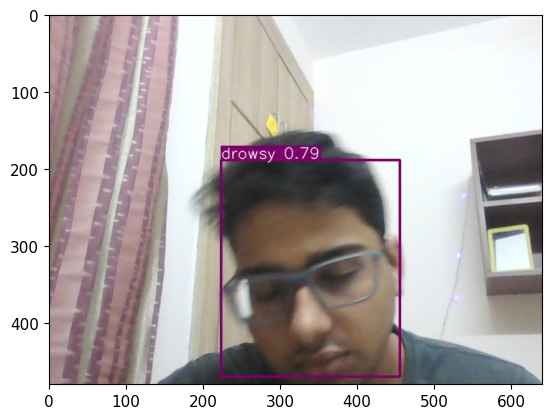

In [27]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
!pip install pygame

DEPRECATION: Loading egg at c:\python312\lib\site-packages\keras-3.5.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\object_detection-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\pyparsing-2.4.7-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\python312\lib\site-packages\sacrebleu-2.2.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacem

In [29]:
#from playsound import playsound
import pygame
import cv2
import numpy as np

# Initialize pygame
pygame.init()

# Load sound file
drowsy_sound = pygame.mixer.Sound('Alert.wav')

# Set drowsiness threshold
drowsy_threshold = 0.2

# Flag to keep track of whether drowsiness was detected in the previous frame
drowsiness_detected = False

# Open camera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)

    #print("Confidences:", [detection.confidence for detection in results.detections])

    # print("Names:", results.names)
    # print("Confidences:", results.confidences)

    # Check if 'drowsy' class is detected
    if len(results.names) > 1 and results.names[1] == 'drowsy':
        confidence = results.confidences[1]  # Confidenqce score for 'drowsy' class
        
        # Check if confidence is above threshold
        if confidence > drowsy_threshold:
            # Play the sound only if drowsiness is detected above the threshold
            if not drowsiness_detected:
                print("Drowsiness detected. Playing sound...")
                drowsy_sound.play()  # Play the sound
                drowsiness_detected = True
        else:
            # Reset the flag if drowsiness is detected below the threshold
            drowsiness_detected = False
    else:
        print()
            
    # Display the results
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Check for quit key
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# Release the camera and close windows
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 